## <center>  <b> NLP Navigator - Assignment 1 </b>  </center>

This is the first assignment of the project and will test your basic python skills and what you have learnt so far about the libraries like numpy and matplotlib. The problem statement and your tasks are described below. You have to rename the notebook as `{Your Name}_Assignment1.ipynb` and write all the code and then generate outputs in it. Submission will be on github and more guidelines will be given soon. The deadline to submit the assignment is `10th June 5:00 PM`

Given a set of $ n $ points in $ d $ dimensional Euclidean Space, we will find all pairs of points whose Euclidean distance is less than $ r $.

Let  $ \overrightarrow{P_1} = (P_{11},P_{12}, \ldots, P_{1d}) $ and $ \overrightarrow{P_2} = (P_{21},P_{22}, \ldots, P_{2d}) $ be two points. Then the Euclidean distance between them is equal to the norm $ \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| $.

We have to find the set $ A = \left\{(i, j): \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| \leq r \right\} $ where $ i,j \in \{1,2,3,...,n\} $.


Obviously we can find it by using 2 nested loops and searching over all pairs, but we will do the task in an optimised way. Let us make a grid where each cell is of dimension $ r \times r $. Then, (say d = 2)

![graph1](https://drive.google.com/uc?export=view&id=1qIcPgkv9Q3fI-eV5AaAobjFIYy_2siZN)

Divide the points into the cells based on their coordinates. For example, say $ 4 $ points $ \left( \frac{1}{2}, \frac{2}{3} \right), \left( \frac{2}{3}, \frac{3}{2} \right), \left( 1, 1 \right), \left( \frac{3}{2}, \frac{5}{2} \right) $ and $ r = 1 $. So the division should be like -

![graph2](https://drive.google.com/uc?export=view&id=1-u-mT1PTxOkow_uz0T8ZBjU35u63uU7F)

Now comes the observation: For any point, the points which are within distance $ d $ from it must lie in 8 adjacent cells and no where else. So, for every point, just search the points present in 8 adjacent cells, and add the valid pairs to the answer set $ A $. Please note that for corner cells, the number of adjacent cells will not be equal to 8. So, write your code including those cases also.
##### Some points for higher dimension cases:
1. Think whether the number of adjacent cells for higher dimensions will be 8 or more (or less).
2. Observe that the dimension of each cell will not be $r*r$ for each case.
##### <u>Note</u>: Assume the pair $ (i,j) $ and $ (j,i) $ to be same. So write your code accordingly. For example, in 2-D space, we will count $ ((1,2), (4,5)) $ and $ ((4,5), (1,2)) $ only once.

## Tasks TO DO:

1. Generate a set of $ 1000 $ random points in $ 2 $ dimensional space with coordinates ranging between 0 and 100.
2. For $ r = \{ 1, 2, \ldots, 10 \} $, divide the points into grid as shown.
   - Show using matplotlib the various points using different colours.
   - Find pairs and store them in a list/set $ A $
3. Do task 1 and 2 for $ d = 3, 4, 10, 50, 100 $ (except plotting) and store the results.
(You can also plot for $ d = 3 $ but it is optional)

# Code

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
COORDINATE_RANGE = 100
R = 5
SAMPLE_SIZE = 100

In [131]:
pts_unscaled = np.random.random(size=(SAMPLE_SIZE,2))
pts_unscaled *= COORDINATE_RANGE
pts = pts_unscaled/R
pts_unscaled

array([[76.06807326,  4.38189352],
       [97.86725699, 33.59466012],
       [ 5.07833594, 90.9282612 ],
       [91.62279763, 82.79761242],
       [ 3.91282044, 39.66597518],
       [66.2678874 , 24.1610313 ],
       [28.75351061, 25.65145662],
       [45.16275706, 96.09988125],
       [88.9960483 , 49.49728001],
       [72.21804436,  0.38319868],
       [25.53265493, 52.96866211],
       [ 9.05345916, 42.12726428],
       [77.7239407 , 80.46920769],
       [93.73152236, 46.75142507],
       [50.23668031, 36.66892549],
       [71.96920466, 75.80089503],
       [93.7760377 ,  8.1212597 ],
       [81.44098677, 17.24499455],
       [37.78182373, 72.63272028],
       [75.23850023, 19.58485531],
       [ 3.30095015, 34.15132276],
       [69.38784145, 21.22359254],
       [18.453612  , 22.4459225 ],
       [27.74213084, 98.05152035],
       [32.80986678, 73.3507749 ],
       [25.33236264, 76.72847059],
       [40.73617477, 66.46010368],
       [17.25923762, 73.67291522],
       [58.18494759,

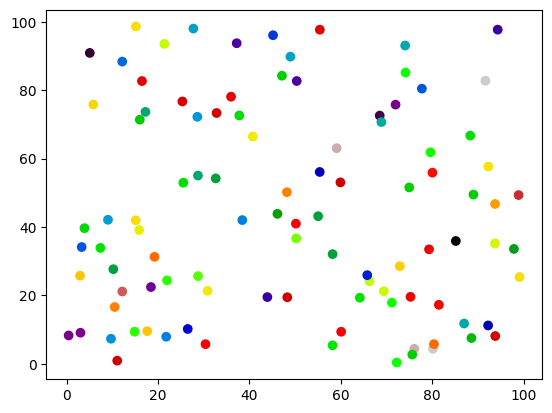

In [132]:
colours = np.random.randint(0,COORDINATE_RANGE,size=(SAMPLE_SIZE,))
plt.scatter(pts_unscaled[:,0],pts_unscaled[:,1],c=colours,cmap="nipy_spectral")
plt.show()

In [133]:
def distance(p1,p2): #p1 is a point -> array of x,y,z,w etc
  dist_sq = 0
  for d in range(0,len(p1)):
    dist_sq += (p1[d]-p2[d])**2
  return dist_sq**0.5

def find_indices(list_of_pts,point):
  indices = np.array([],dtype='uint32')
  for i in range(0,SAMPLE_SIZE):
   if(np.array_equal(list_of_pts[i],point)):
    indices = np.append(indices,i)
  return indices

def print_pairs(pairs):
  for pair in pairs:
    if(len(pair)==0):
     continue
    else:
     print(pts_unscaled[pair[0]],"and",pts_unscaled[pair[1]])

### Finding the pairs for two dimensions

My approach assigns a cell to each point by applying floor(x) to the coordinates of that point, as a result (0.5,0.75) belongs to cell (0,0) and (1.2,2.9) belongs to cell (1,2)

For every point P being checked, now I add -1,0 or 1 to the cell coordinates and find all points lying in those cells (P')
Finally I only check the distance criterion between P and P', not P and all points in the initial set

The final output will be in the form of a list of pairs of indices of the points which satisfy the given condition

In [134]:
cells = np.int32(pts)
pairs = [()]
# pairs = [ (index1, indexm) , (index1, indexn) , ... ]
for t in range(0,SAMPLE_SIZE):
  a = cells[t][0]
  b = cells[t][1]
  p = [a,b]

  for i in [-1,0,1]:
   for j in [-1,0,1]:
    if(a==0 and i<0):
      continue
    elif(b==0 and j<0):
      continue
    else:
      idx = find_indices(cells,[a+i,b+j])
      if(i==0 and j==0):
        lst = idx[idx!=t]
        for m in lst:
          if(distance(pts[t],pts[m])<=1):
            pair = (t,m)
            pair_rev = (m,t)
            if(len(pairs[0])==0):
              pairs[0] = pair
            elif (pair in pairs) or (pair_rev in pairs):
              continue
            else:
              pairs.append(pair)
      else:
        for m in idx:
          if(distance(pts[t],pts[m])<=1):
            pair = (t,m)
            pair_rev = (m,t)
            if(len(pairs[0])==0):
              pairs[0] = pair
            elif (pair in pairs) or (pair_rev in pairs):
              continue
            else:
              pairs.append(pair)

pairs


[(0, 34),
 (0, 62),
 (0, 94),
 (1, 89),
 (5, 21),
 (5, 98),
 (6, 46),
 (9, 34),
 (10, 57),
 (14, 61),
 (15, 30),
 (16, 67),
 (19, 87),
 (20, 72),
 (21, 87),
 (22, 66),
 (24, 53),
 (27, 64),
 (28, 51),
 (30, 56),
 (32, 74),
 (34, 62),
 (37, 92),
 (38, 57),
 (41, 96),
 (49, 69),
 (50, 74),
 (61, 93),
 (62, 94),
 (70, 78),
 (80, 85),
 (88, 95)]

### Now for D dimensions, edit parameters

In [114]:
D = 4
COORDINATE_RANGE = 20
R = 2
SAMPLE_SIZE = 100

In [115]:
pts_unscaled = np.random.random(size=(SAMPLE_SIZE,D))
pts_unscaled *= COORDINATE_RANGE
pts = pts_unscaled/R
pts_unscaled

array([[12.81721141, 14.89619979,  7.92489666,  7.02518972],
       [14.61025379,  2.22772351,  5.45649963,  7.16370274],
       [ 4.8196123 ,  7.20356288, 13.52565018,  9.45739192],
       [14.661842  , 15.66070196,  2.11318259,  5.41673409],
       [ 0.40971546, 19.23954685,  0.39401454,  9.16624978],
       [ 6.03153217,  2.10657228, 10.4939357 , 17.58602807],
       [10.85721906, 16.82175898, 12.98168334, 19.61243133],
       [13.64959843, 16.07768136, 15.20275799, 11.35955224],
       [ 4.24903742,  5.31752745,  8.61427196, 13.98022188],
       [ 2.94367287,  3.42423796,  5.67518404,  2.77312703],
       [ 9.32581046,  1.85963422,  9.26144446,  0.99231895],
       [ 9.91701057,  0.48120347,  7.40895811, 14.14272441],
       [11.43398627,  6.37312244,  7.46390275,  2.05756236],
       [ 5.49826665, 17.02075011,  0.05905147, 19.17155518],
       [ 0.39029624,  0.61150918, 15.57609542, 11.70008116],
       [11.4347352 ,  6.98256642, 10.45246973,  6.58963184],
       [ 4.68617243, 11.

Now we define a function to get the ternary(base 3) of an integer
This is done to generate combinations of -1,0 and 1 in each dimension
Since there are D dimensions we shall generate 3^D numbers

These combinations will be used as the condition to check which points lie in adjacent cells of the current point P by adding 1,0 or -1 to the cell in which the point is located, it is an extrapolation of the concept in 2D but there it was easy to generate two loops corresponding to two dimensions of x and y where i and j varied from -1,0 and 1

ternary(x) shall take as an input an integer x and convert it to an array of base 3 containing digits as many as there are dimensions
If we loop from 0 to 3^d - 1 (inclusive) then we get all 3^d required combinations of -1 0 and 1 in a list

In [116]:
def ternary(t):
  x = t
  x = int(x)
  b3 = np.array([],dtype='uint32')
  for i in range(0,D):
   b3 = np.append(b3,x%3)
   x = x//3
  b3 = b3 - 1
  return b3

Now we shall finally find all the points in the adjacent "cells" of the D dimension and check if the points in those cells are within a vicinity r of the current point

In [117]:
cells = np.int32(pts)
pairs = [()]

for t in range(0,SAMPLE_SIZE):
  cell = cells[t]
  for i in range(0,3**D):
    skip_particular_i = False
    x = ternary(i)
    for d in range(0,D): #Looping over all dimensions, if the cell touches one of the axes we dont add -1 to the cell index
     if(cell[d]==0 and x[d]<0):
      skip_particular_i = True
      break #Breaks only inner loop
    if(skip_particular_i):
      continue #Skips this particular iteration where the above condition of the axis touching is satisfied
    #Now the corner cases are dealt with
    #idx = find_indices(cells,[a+i,b+j])
    checking_cell = np.copy(cell) + x
    idx = find_indices(cells,checking_cell)
    if(np.array_equal(cell,checking_cell)):
     idx = idx[idx!=t] #Avoiding pairing with itself
    for m in idx:
      if(distance(pts[t],pts[m])<=1):
            pair = (t,m)
            pair_rev = (m,t)
            if(len(pairs[0])==0):
              pairs[0] = pair
            elif (pair in pairs) or (pair_rev in pairs):
              continue
            else:
              pairs.append(pair)

pairs

[(18, 65), (33, 59), (65, 93)]